In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab08.ipynb")

# Lab 8: Model Selection, Regularization, and Cross-Validation
In this lab, you will practice using `scikit-learn` to generate models of various complexity. You'll then use the holdout method and K-fold cross-validation to select the models that generalize best.

**Due Date: Saturday, July 16, 11:59 PM PT.**

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [45]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown

### Introduction

For this lab, we will use a toy dataset to predict the house prices in Boston with data provided by the `sklearn.datasets` package. There are more interesting datasets in the package if you want to explore them during your free time!

Run the following cell to load the data. `load_boston()` will return a dictionary object which includes keys for:
- `data` : the covariates (X)
- `target` : the response vector (Y)
- `feature_names`: the column names
- `DESCR` : a full description of the data
- `filename`: name of the csv file


In [46]:
import pickle
boston_data = pickle.load(open("boston_data.pickle", "rb")) 


print(boston_data.keys())
sum(boston_data.data)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


array([1.82844292e+03, 5.75000000e+03, 5.63521000e+03, 3.50000000e+01,
       2.80675700e+02, 3.18002500e+03, 3.46989000e+04, 1.92029160e+03,
       4.83200000e+03, 2.06568000e+05, 9.33850000e+03, 6.40245000e+03])

In [47]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 12 numeric/categorical predictive. Median Value (attribute 13) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

A look at the `DESCR` attribute tells us the data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. LSTAT    % lower status of the population
    
Let's now convert this data into a pandas DataFrame. 

In [48]:
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


### Question 1

Let's model this housing price data! Before we can do this, however, we need to split the data into training and test sets. Remember that the response vector (housing prices) lives in the `target` attribute. A random seed is set here so that we can deterministically generate the same splitting in the future if we want to test our result again and find potential bugs.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for the test set. Call the resulting splits `X_train`, `X_holdout`, `Y_train`, `Y_holdout`. Here "holdout" refers to the fact that we're going to hold this data our when training our model.

<!--
BEGIN QUESTION
name: q1
-->

In [49]:
from sklearn.model_selection import train_test_split
np.random.seed(45)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size=0.1)

In [50]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2

As a warmup, fit a linear model to describe the relationship between the housing price and all available covariates. We've imported `sklearn.linear_model` as `lm`, so you can use that instead of typing out the whole module name. Fill in the cells below to fit a linear regression model to the covariates and create a scatter plot for our predictions vs. the true prices.

<!--
BEGIN QUESTION
name: q2
-->

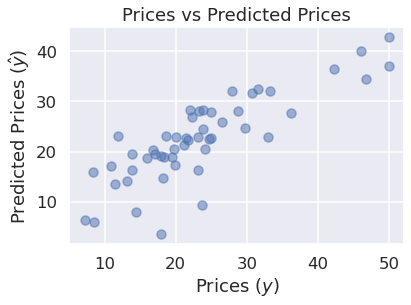

In [51]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_holdout)

# Plot predicted vs true prices
plt.scatter(Y_holdout, Y_pred, alpha=0.5)
plt.xlabel("Prices $(y)$")
plt.ylabel("Predicted Prices $(\hat{y})$")
plt.title("Prices vs Predicted Prices");

Briefly analyze the scatter plot above. Do you notice any outliers? Write your answer in the cell below.

_There are some outliers not around y hat = y line. For instance,when the price is 18, the corresponding predicted one is nearly zero._

Alternatively, we can plot the residuals vs. our model predictions. Ideally they'd all be zero. Given the inevitably of noise, we'd at least like them to be scatter randomly across the line where the residual is zero. By contrast, there appears to be a possible pattern with our model consistently underestimating prices for both very low and very high values, and possibly consistently overestimating prices towards the middle range.

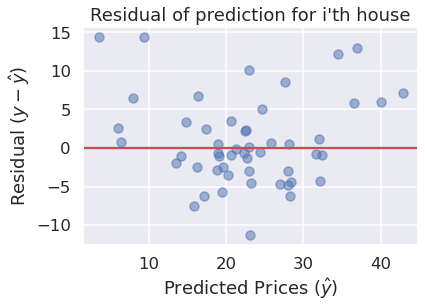

In [52]:
plt.scatter(Y_pred, Y_holdout - Y_pred, alpha=0.5)
plt.ylabel("Residual $(y - \hat{y})$")
plt.xlabel("Predicted Prices $(\hat{y})$")
plt.title("Residuals vs Predicted Prices")
plt.title("Residual of prediction for i'th house")
plt.axhline(y = 0, color='r');

### Question 3

As we find from the scatter plot, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). Compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the held out set `X_holdout`.  Your implementation **should not** use for loops.

<!--
BEGIN QUESTION
name: q3
-->

In [53]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y-predicted_y)**2))

train_error = rmse(Y_train, linear_model.predict(X_train) )
holdout_error = rmse(Y_holdout, linear_model.predict(X_holdout) )

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 4.633297105625516
Holdout RMSE: 5.685160866583954


In [11]:
grader.check("q3")

q3 results: All test cases passed!

Is your training error lower than the error on the data the model never got to see? If so, why could this be happening? Answer in the cell below.

_The training error is lower, because the model overfits the trained set._

## Overfitting

Sometimes we can get even higher accuracy by adding more features. For example, the code below adds the square, square root, and hyperbolic tangent of every feature to the design matrix. We've chosen these bizarre features specifically to highlight overfitting.

In [13]:
boston_with_extra_features = boston.copy()
for feature_name in boston.columns:
    boston_with_extra_features[feature_name + "^2"] = boston_with_extra_features[feature_name] ** 2
    boston_with_extra_features["sqrt" + feature_name] = np.sqrt(boston_with_extra_features[feature_name])
    boston_with_extra_features["tanh" + feature_name] = np.tanh(boston_with_extra_features[feature_name])
    
boston_with_extra_features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,tanhRAD,TAX^2,sqrtTAX,tanhTAX,PTRATIO^2,sqrtPTRATIO,tanhPTRATIO,LSTAT^2,sqrtLSTAT,tanhLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.761594,87616.0,17.204651,1.0,234.09,3.911521,1.0,24.8004,2.231591,0.999905
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.964028,58564.0,15.556349,1.0,316.84,4.219005,1.0,83.5396,3.023243,1.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.964028,58564.0,15.556349,1.0,316.84,4.219005,1.0,16.2409,2.007486,0.999368
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.995055,49284.0,14.899664,1.0,349.69,4.324350,1.0,8.6436,1.714643,0.994426
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.995055,49284.0,14.899664,1.0,349.69,4.324350,1.0,28.4089,2.308679,0.999953


We split up our data again and refit the model. From this cell forward, we append `2` to the variable names `X_train, X_holdout, Y_train, Y_holdout, train_error, holdout_error` in order to maintain our original data. **Make sure you use these variable names from this cell forward**, at least until we get to the part where we create version 3 of each of these.

In [55]:
np.random.seed(25)
X = boston_with_extra_features
X_train2, X_holdout2, Y_train2, Y_holdout2 = train_test_split(X, Y, test_size = 0.10)
linear_model.fit(X_train2, Y_train2);

Looking at our training and test RMSE, we see that they are lower than you computed earlier. This strange model is seemingly better, even though it includes seemingly useless features like the hyperbolic tangent of the average number of rooms per dwelling.

In [56]:
train_error2 = rmse(Y_train2, linear_model.predict(X_train2)) 
holdout_error2 = rmse(Y_holdout2, linear_model.predict(X_holdout2))

print("Training RMSE:", train_error2)
print("Holdout RMSE:", holdout_error2)

Training RMSE: 3.3514483036916123
Holdout RMSE: 5.4101204143446


The code below generates the training and holdout RMSE for 49 different models stores the results in a DataFrame. The first model uses only the first feature "CRIM". The second model uses the first two features "CRIM" and "ZN", and so forth.

In [58]:
errors_vs_N = pd.DataFrame(columns = ["N", "Training Error", "Holdout Error"])
range_of_num_features = range(1, X_train2.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = X_train2.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train2)
    train_error_overfit = rmse(Y_train2, linear_model.predict(X_train_first_N_features))
    
    X_holdout_first_N_features = X_holdout2.iloc[:, :N]
    holdout_error_overfit = rmse(Y_holdout2, linear_model.predict(X_holdout_first_N_features))    
    errors_vs_N.loc[len(errors_vs_N)] = [N, train_error_overfit, holdout_error_overfit]
    
errors_vs_N.head()

,N,Training Error,Holdout Error
0,1.0,8.536340,7.825177
1,2.0,8.085693,7.637465
2,3.0,7.776942,7.213870
3,4.0,7.643897,6.391482
4,5.0,7.634894,6.372166


If we plot the training and holdout error as we add each additional feature, our training error gets lower and lower (since our model bias is increasing), and in fact it's possible to prove with linear algebra that the training error will decrease monotonically.

By contrast, the error on unseen held out data is higher for the models with more parameters, since the lessons learned from these last 20+ features aren't actually useful when applied to unseen data. That is, these models aren't generalizable.

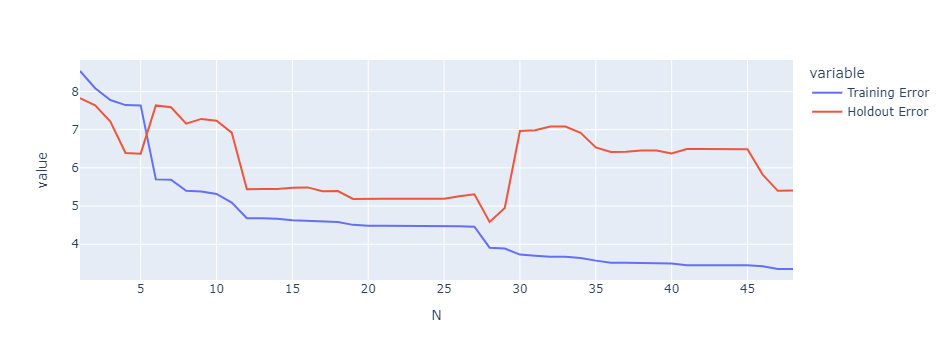

In [59]:
import plotly.express as px
px.line(errors_vs_N, x = "N", y = ["Training Error", "Holdout Error"])

This plot is a useful tool for **model selection**: the best model is the one the lowest error on the holdout set, i.e. the one that includes parameters 1 through 28.

## Regularization

As an alternative and more realistic example, instead of using only the first N features, we can use various different regularization strengths. For example, for really low regularization strengths (e.g. $\alpha = 10^{-12}$), we get a model that is nearly identical to our linear regression model.

In [60]:
from sklearn.linear_model import Ridge

regularized_model = Ridge(alpha = 1e-12)
regularized_model.fit(X_train2, Y_train2)
ridge_coefs_low_regularization = regularized_model.coef_

linear_model = linear_model.fit(X_train2, Y_train2)
linear_coefs = linear_model.coef_

# what is the difference between the Ridge and OLS coefficients?
(ridge_coefs_low_regularization - linear_coefs).round()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=6.96265e-26): result may not be accurate.



array([ 0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0., -0., -0., -0.,  0., -1., -0.,  1., -0., -0.,
       -0.,  0.,  0., -1.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
        0.,  0., -0., -0., -0., 63.,  0., -0., -0.])

However, if we pick a large regularization strength, e.g. $\alpha = 10^4$, we see that the resulting parameters are much smaller in magnitude. 

In [61]:
regularized_model = Ridge(alpha = 10**4)
regularized_model.fit(X_train2, Y_train2)
regularized_model.coef_

array([-2.64236947e-02, -9.32767913e-03, -2.42925745e-02,  5.47079848e-03,
       -2.54276859e-03,  1.92843599e-02, -5.85037883e-02, -2.06397155e-02,
        2.62611572e-02, -4.16712719e-02, -1.95840395e-03, -1.91841765e-01,
       -1.08846586e-03, -4.28805626e-03,  1.70791430e-03,  6.51767238e-04,
        1.71133790e-03,  1.07486010e-03, -1.19407955e-03, -7.15970642e-03,
       -7.29287455e-04,  5.47079848e-03,  5.47079848e-03,  4.16652815e-03,
       -3.60910235e-03, -1.50954020e-03, -1.59681172e-03,  3.35928833e-01,
        3.11186224e-03, -2.79750628e-06,  4.48782500e-04, -5.71759051e-03,
        2.22943575e-06, -6.59740404e-02, -7.01191670e-03, -1.58200606e-03,
        1.32454447e-03,  8.15878522e-03,  1.17645581e-03,  3.59660322e-05,
       -2.54207413e-03,  0.00000000e+00, -2.57499245e-02, -3.15683513e-04,
       -8.10116026e-15, -6.45893053e-03, -4.20286900e-02, -2.29035441e-04])

### Standard Scaling

Recall from lecture that in order to properly regularize a model, the features should be at the same scale. Otherwise the model has to spend more of its parameter budget to use "small" features (e.g. lengths in inches) compared to "large" features (e.g. lengths in kilometers).

To do this we can use a Standard Scaler to create a new version of the DataFrame where every column has zero mean and a standard deviation of 1.

In [62]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(boston_with_extra_features)
boston_with_extra_features_scaled = pd.DataFrame(ss.transform(boston_with_extra_features), columns = boston_with_extra_features.columns)
boston_with_extra_features_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,tanhRAD,TAX^2,sqrtTAX,tanhTAX,PTRATIO^2,sqrtPTRATIO,tanhPTRATIO,LSTAT^2,sqrtLSTAT,tanhLSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,...,-4.863216,-0.682024,-0.644166,0.0,-1.458429,-1.453573,0.135096,-0.789529,-1.202689,0.103530
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,...,-0.521299,-0.866530,-1.053383,0.0,-0.373078,-0.266921,0.179012,-0.540454,-0.399953,0.128396
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,...,-0.521299,-0.866530,-1.053383,0.0,-0.373078,-0.266921,0.179012,-0.825825,-1.429933,-0.037847
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,...,0.144191,-0.925467,-1.216415,0.0,0.057783,0.139631,0.179251,-0.858040,-1.726876,-1.338649
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,...,0.144191,-0.925467,-1.216415,0.0,0.057783,0.139631,0.179251,-0.774228,-1.124522,0.116050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,...,-4.863216,-0.765138,-0.813468,0.0,1.255407,1.136187,0.179299,-0.498180,-0.312324,0.128400
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,...,-4.863216,-0.765138,-0.813468,0.0,1.255407,1.136187,0.179299,-0.545089,-0.410031,0.128395
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,...,-4.863216,-0.765138,-0.813468,0.0,1.255407,1.136187,0.179299,-0.759808,-1.057406,0.121757
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,...,-4.863216,-0.765138,-0.813468,0.0,1.255407,1.136187,0.179299,-0.716638,-0.884300,0.127164


Let's now regenerate the training and holdout sets using this new rescaled dataset.

In [63]:
np.random.seed(25)
X = boston_with_extra_features_scaled
X_train3, X_holdout3, Y_train3, Y_holdout3 = train_test_split(X, Y, test_size = 0.10)

Fitting our regularized model with $\alpha = 10^2$ on this scaled data, we now see that our coefficients are of about the same magnitude. This is because all of our features are of around the same magnitude, whereas in the unscaled data, some of the features like TAX^2 were much larger than others.

In [64]:
from sklearn.linear_model import Ridge
regularized_model = Ridge(alpha = 10**2)
regularized_model.fit(X_train3, Y_train3)
regularized_model.coef_

array([-0.61501303, -0.04142113, -0.13765542,  0.11847528, -0.48559142,
        1.08393358, -0.11193455, -0.64465234,  0.25956766, -0.41922259,
       -0.48366801, -1.23850021, -0.22227014, -0.51281684,  0.4095214 ,
        0.25373746, -0.07390573,  0.06674762,  0.11386256, -0.32684803,
       -0.39658034,  0.11847528,  0.11847528,  0.11847528, -0.67728184,
       -0.385382  , -0.36114119,  1.65269501,  0.78959095, -1.09450356,
       -0.02430292, -0.14153651,  0.11511135, -0.41673302, -0.72747136,
       -1.36478486,  0.21308669,  0.30241209,  0.45131897, -0.16799051,
       -0.59340146,  0.        , -0.4363721 , -0.50878717, -0.16529846,
       -0.04194837, -1.94295191, -0.70807689])

### Finding an Optimum Alpha

In the cell below, write code that generates a DataFrame with the training and holdout error for the range of alphas given. Make sure you're using the 3rd training and holdout sets, which have been rescaled!

**Note: You should use all 48 features for every single model that you fit, i.e. you're not going to be keeping only the first N features.**

*Hint*: It is possible to "append" or add a row to a DataFrame by calling `loc`, e.g. `df.loc[len(df)] = [2, 3, 4]` (assuming `df` has 3 columns!).

In [75]:
error_vs_alpha = pd.DataFrame(columns = ["alpha", "Training Error", "Holdout Error"])
range_of_alphas = 10**np.linspace(-5, 4, 40)

for alpha in range_of_alphas:
    regularized_model = Ridge(alpha)
    regularized_model.fit(X_train3, Y_train3)
    train_error_overfit = rmse(Y_train3, regularized_model.predict(X_train3))
    holdout_error_overfit = rmse(Y_holdout3, regularized_model.predict(X_holdout3))
    error_vs_alpha.loc[len(error_vs_alpha)] = [alpha,train_error_overfit,holdout_error_overfit]

error_vs_alpha.head()

,alpha,Training Error,Holdout Error
0,0.000010,3.344803,5.389721
1,0.000017,3.344885,5.362695
2,0.000029,3.345094,5.318838
3,0.000049,3.345589,5.249550
4,0.000084,3.346673,5.144905


Below we plot your training and holdout set error for the range of alphas given. You should see a figure where training error goes down as model complexity increases, but the error on the held out set is large for extreme values of alpha, and minimized for some intermediate value.

Note that on your plot, the **x-axis is in the inverse of complexity**! In other words, small alpha models (on the left) are complex, because there is no regularization. That's why the training error is lowest on the left side of the plot, as this is where overfitting occurs.

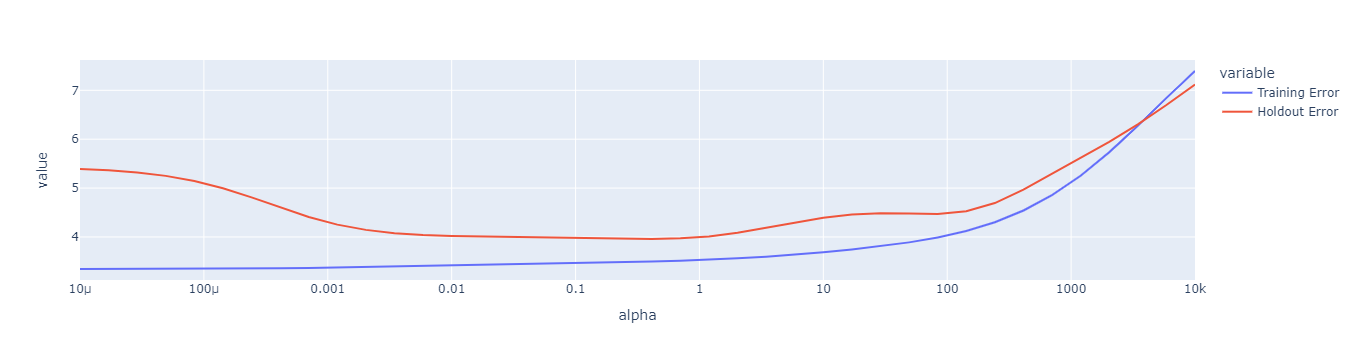

In [38]:
px.line(error_vs_alpha, x = "alpha", y = ["Training Error", "Holdout Error"], log_x=True)

From the plot above, what is the best alpha to use?

_Alpha is aroud 0.4._

## REMINDER: Test Set vs. Validation Set (a.k.a. Development Set)

In the plots above, we trained our models on a training set, and plotted the resulting RMSE on the training set in blue. We also held out a set of data, and plotted the error on this holdout set in red, calling it the "holdout set error". 

For the example above, since we used the holdout set to pick a hyperparameter, we'd call the holdout set a "validation set" or "development set". These terms are exactly synonomous.

It would not be accurate to call this line the "test set error", because we did not use this dataset as a test set. While it is true that your code never supplied X_test3 or Y_test3 to the fit function of the ridge regression models, once you decide to use the holdout set to select between different models, different hyperparameters, or different sets of features, then we are not using that dataset as a "test set".

That is, since we've used this holdout set for picking alpha, the resulting errors are no longer unbiased predictors of our performance on unseen models -- the true error on an unseen dataset is likely to be somewhat higher than the validation set. After all, we trained 40 models and picked the best one!

In many real world contexts, model builders will split their data into three sets: training, validation, and test sets, where the test set is only ever used once. That is, there are two holdout sets: One used as a development set (for model selection), and one used a test set (for providing an unbiased estimate of error).

## An Alternate Strategy for Hyper Parameter Selection: K-Fold Cross Validation

Earlier we used the holdout method for model selection (the holdout method is also sometimes called "simple cross validation"). Another approach is K-fold cross validation. This allows us to use more data for training instead of having to set aside some specifically for hyperparameter selection. However, doing so requires more computation resources as we'll have to fit K models per hyperparameter choice.

In our course Data 100, there's really no reason not to use cross validation. However, in environments where models are very expensive to train (e.g. deep learning), you'll typically prefer using a holdout set (simple cross validation) rather than K-fold cross validation.

To emphasize what K-fold cross validation actually means, we're going to manually carry out the procedure. Recall the approach looks something like the figure below for 4-fold cross validation:

<img src="cv.png" width=500px>

When we use K-fold cross validation, rather than using a held out set for model selection, we instead use the training set for model selection. To select between various features, various models, or various hyperparameters, we split the training set further into multiple temporary train and validation sets (each split is called a "fold", hence k-fold cross validation). We will use the average validation error across all k folds to make our optimal feature, model, and hyperparameter choices. In this example, we'll only use this procedure for hyperparameter selection, specifically to choose the best alpha.

### Question 4

Scikit-learn has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For **each** split:
    1. Select out the training and validation rows and columns based on the split indices and features.
    2. Compute the RMSE on the validation split.
    3. Return the average error across all cross validation splits.

<!--
BEGIN QUESTION
name: q4
-->

In [39]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train,split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [40]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5

Use `compute_CV_error` to add a new column to `error_vs_alpha` which gives the 4-fold cross validation error for the given choice of alpha.
<!--
BEGIN QUESTION
name: q5
-->

In [42]:
cv_errors = []
range_of_alphas = 10**np.linspace(-5, 4, 40)

for alpha in range_of_alphas:
    cv_error = compute_CV_error(Ridge(alpha), X_train3, Y_train3)
    cv_errors.append(cv_error)

error_vs_alpha["CV Error"] = cv_errors
error_vs_alpha.head()

,alpha,Training Error,Holdout Error,CV Error
0,0.000010,3.344803,5.389721,10.763332
1,0.000017,3.344885,5.362695,10.577999
2,0.000029,3.345094,5.318838,10.254706
3,0.000049,3.345589,5.249550,9.756307
4,0.000084,3.346673,5.144905,9.054990


The code below shows the holdout error that we computed in the previous problem as well as the 4-fold cross validation error. Note that the cross validation error shows a similar dependency on alpha relative to the holdout error. This is because they are both doing the same thing, namely trying to estimate the expected error on unseen data drawn from distribution from which the training set was drawn. 

In other words, this figure compares the holdout method with 4-fold cross validation.

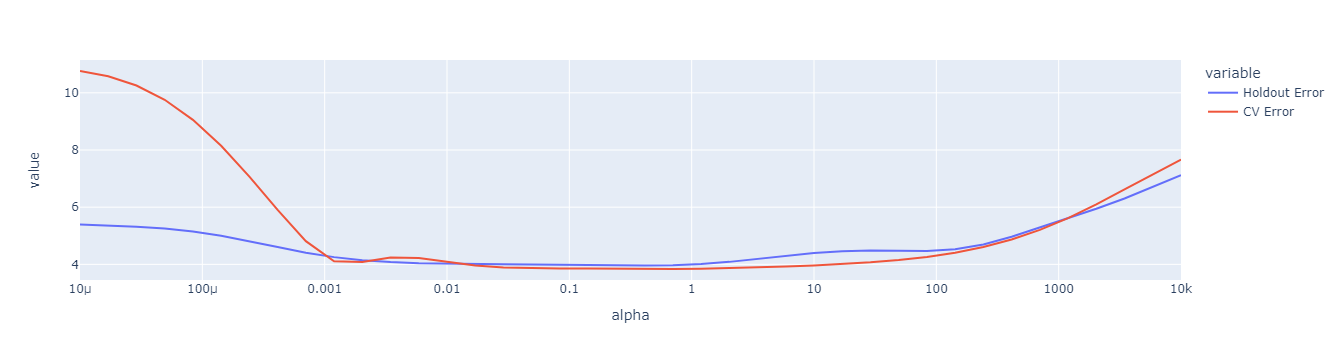

In [43]:
px.line(error_vs_alpha, x = "alpha", y = ["Holdout Error", "CV Error"], log_x=True)

## Submission

Congratulations! You are finished with this assignment.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

q1 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)